In [1]:
# example one

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import rebound
from rebound import hash as h

In [4]:
sa = rebound.Simulationarchive("archive_new.bin")

In [5]:
N_pl = 8
N_tp = 20

In [6]:
t = np.zeros(len(sa))
a = np.zeros(len(sa))
e = np.zeros(len(sa))
inc = np.zeros(len(sa))
omega = np.zeros(len(sa))
Omega = np.zeros(len(sa))
M = np.zeros(len(sa))

In [22]:
pid = 110
for i, sim in enumerate(sa):
    t[i] = sim.t/1e6
    try:
        a[i] = sim.particles[h(pid)].a
        e[i] = sim.particles[h(pid)].e
        inc[i] = sim.particles[h(pid)].inc
        omega[i] = sim.particles[h(pid)].omega
        Omega[i] = sim.particles[h(pid)].Omega
        M[i] = sim.particles[h(pid)].M
    except rebound.ParticleNotFound:
        a = a[:i]
        e = e[:i]
        inc = inc[:i]
        omega = omega[:i]
        Omega = Omega[:i]
        M = M[:i]
        t = t[:i]
        break

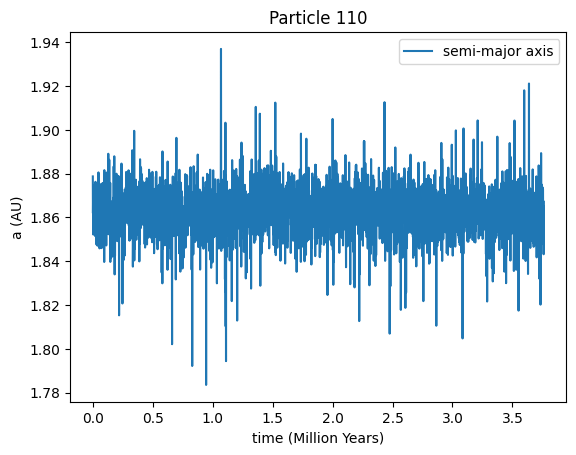

In [32]:
plt.plot(t, a, label="semi-major axis")
plt.xlabel("time (Million Years)")
plt.ylabel("a (AU)")
plt.title("Particle {0}".format(pid))
plt.legend()

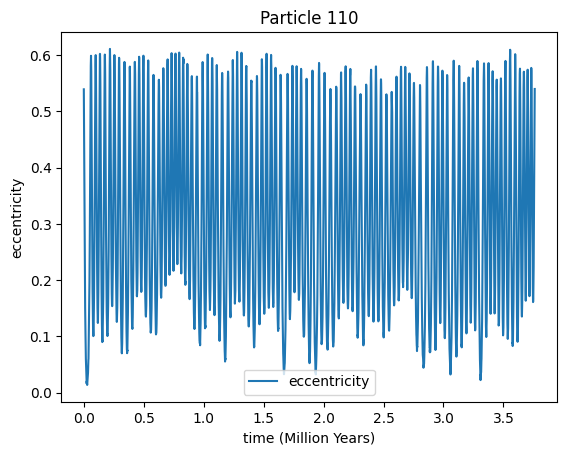

In [34]:
plt.plot(t, e, label="eccentricity")
plt.xlabel("time (Million Years)")
plt.ylabel("eccentricity")
plt.title("Particle {0}".format(pid))
plt.legend()

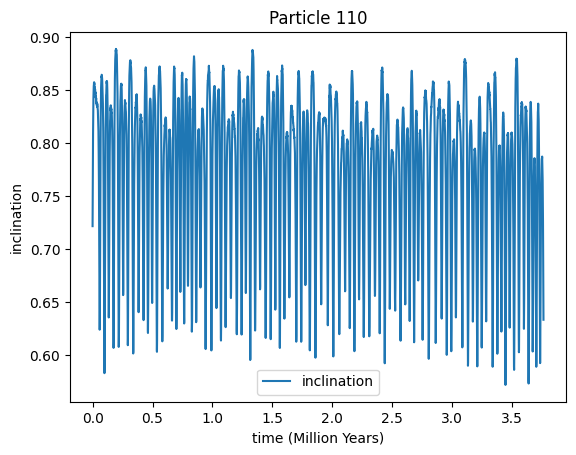

In [35]:
plt.plot(t, inc, label="inclination")
plt.xlabel("time (Million Years)")
plt.ylabel("inclination")
plt.title("Particle {0}".format(pid))
plt.legend()

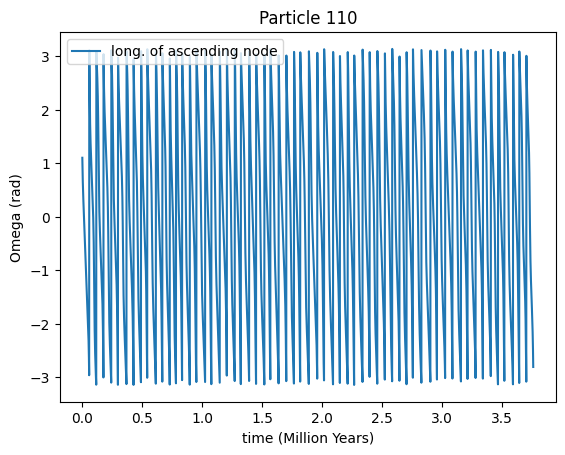

In [37]:
plt.plot(t, Omega, label="long. of ascending node")
plt.xlabel("time (Million Years)")
plt.ylabel("Omega (rad)")
plt.title("Particle {0}".format(pid))
plt.legend()

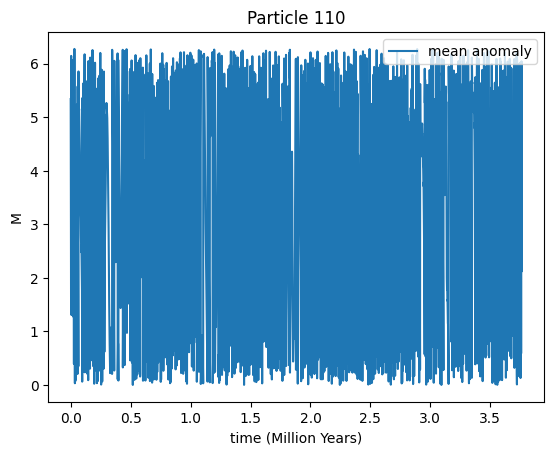

In [39]:
plt.plot(t, M, label="mean anomaly")
plt.xlabel("time (Million Years)")
plt.ylabel("M")
plt.title("Particle {0}".format(pid))
plt.legend()

In [28]:
q = [a[i] * (1 - e[i]) for i in range(len(a))]
Q = [a[i] * (1 + e[i]) for i in range(len(a))]

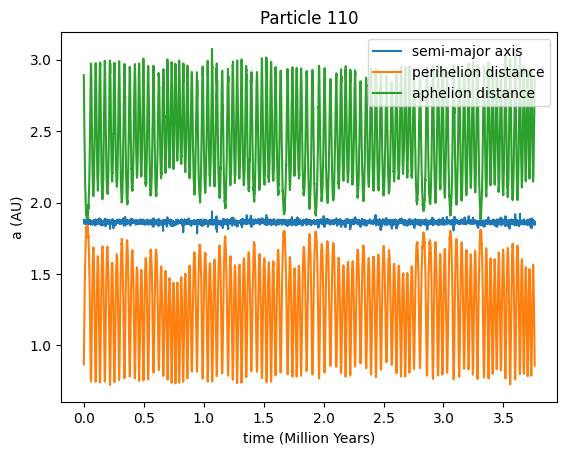

In [29]:
plt.plot(t, a, label="semi-major axis")
plt.plot(t, q, label="perihelion distance")
plt.plot(t, Q, label="aphelion distance")
plt.xlabel("time (Million Years)")
plt.ylabel("a (AU)")
plt.title("Particle {0}".format(pid))
plt.legend()

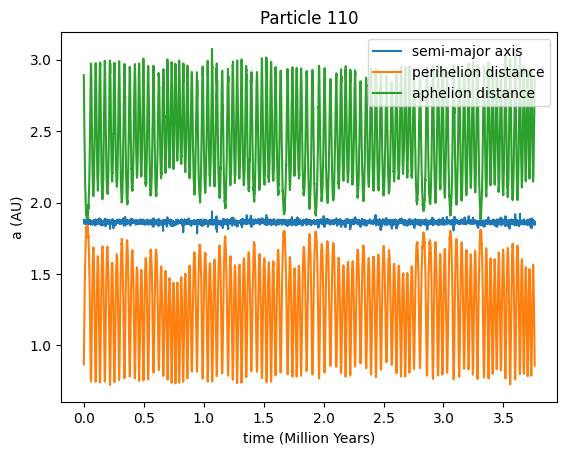

In [30]:
plt.plot(t, a, label="semi-major axis")
plt.plot(t, q, label="perihelion distance")
plt.plot(t, Q, label="aphelion distance")
plt.xlabel("time (Million Years)")
plt.ylabel("a (AU)")
plt.title("Particle {0}".format(pid))
plt.legend()

In [12]:
# example two

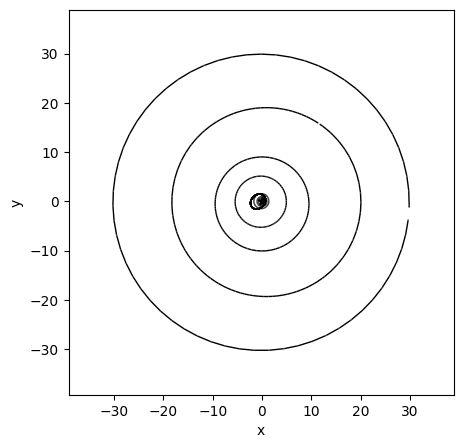

In [13]:
op1 = rebound.OrbitPlot(sa[0], orbit_style="solid", lw=1)
op1.particles.set_sizes([0])

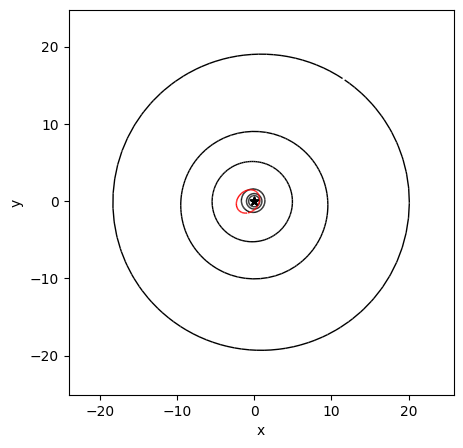

In [14]:
pid = 110
op1 = rebound.OrbitPlot(sa[0], orbit_style="solid", lw=1, particles=[1,2,3,4,5,6])
op1.particles.set_sizes([0])
op2 = rebound.OrbitPlot(sa[0], fig=op1.fig, ax=op1.ax, orbit_style="solid", lw=1, particles=[h(pid)], color="red")
op2.particles.set_sizes([0])

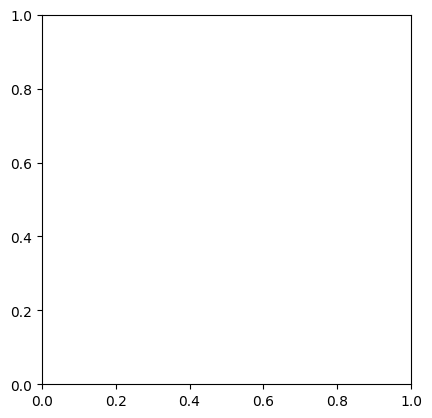

In [15]:
pid = 110

count = 0
fig, ax = plt.subplots()

for i, sim in enumerate(sa):
    if i%100:
        continue
    try:
        op1 = rebound.OrbitPlot(sim, fig=fig, ax=ax, orbit_style="solid", lw=1, particles=[1,2,3,4,5,6])
        op1.particles.set_sizes([0])
        op2 = rebound.OrbitPlot(sim, fig=fig, ax=ax, orbit_style="solid", lw=1, particles=[h(pid)], color="red")
        op2.particles.set_sizes([0])

        ax.set_aspect("equal")
        ax.set_xlim(-8,8)
        ax.set_ylim(-8,8)
        ax.set_xlabel("x [AU]")
        ax.set_ylabel("y [AU]")

        ax.set_title("Particle {0}".format(pid))
        ax.text(-4,-7,"t={:4.1f} Myr".format(sim.t/1e6))

        fig.savefig("frame_{:04d}.png".format(count))
        count += 1

        ax.clear()
    except rebound.ParticleNotFound:
        break

In [16]:
#example three

In [17]:
a_all = []
e_all = []

In [18]:
for i, sim in enumerate(sa):
    for pid in range(100, 100+N_tp):
        try:
            a_all.append(sim.particles[h(pid)].a)
            e_all.append(sim.particles[h(pid)].e)
        except rebound.ParticleNotFound:
            continue

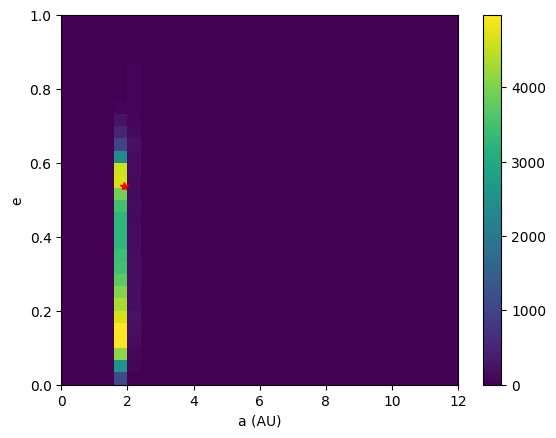

In [19]:
amin, amax = 0, 12
emin, emax = 0, 1
h2d, xedge, yedge, im = plt.hist2d(a_all, e_all, range=[[amin, amax], [emin, emax]], bins=(30,30))
plt.xlabel("a (AU)")
plt.ylabel("e")
plt.colorbar()

a_init = 1.8962438188689117
e_init = 0.5378407335664053
plt.plot(a_init, e_init, "*", color="r")

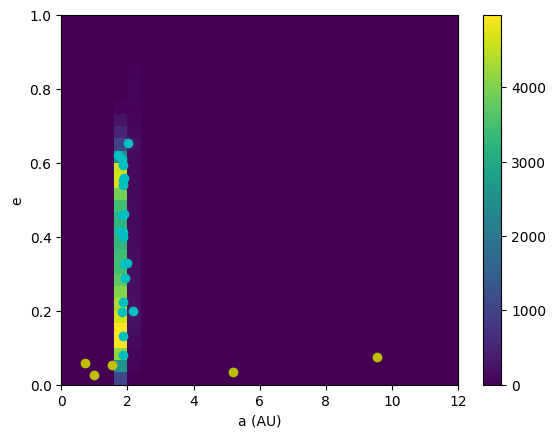

In [20]:
amin, amax = 0, 12
emin, emax = 0, 1
h2d, xedge, yedge, im = plt.hist2d(a_all, e_all, range=[[amin, amax], [emin, emax]], bins=(30,30))
plt.xlabel("a (AU)")
plt.ylabel("e")
plt.colorbar()

a_init = 1.8962438188689117
e_init = 0.5378407335664053
plt.plot(a_init, e_init, "*", color="r")

sim = sa[-1]
a_tp = []
e_tp = []

for pid in range(100, 100+N_tp):
    try:
        a_tp.append(sim.particles[h(pid)].a)
        e_tp.append(sim.particles[h(pid)].e)
    except:
        continue
plt.plot(a_tp, e_tp, "co")

a_pl = []
e_pl = []
for id in range(1, N_pl):
    a_pl.append(sim.particles[id].a)
    e_pl.append(sim.particles[id].e)
plt.plot(a_pl, e_pl, "yo")

C:\Users\user\AppData\Local\Temp\ipykernel_4136\3184824650.py:3: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 2 Axes> than <Figure size 640x480 with 2 Axes> which fig.colorbar is called on.
  cbar = fig.colorbar(im, ax=ax)


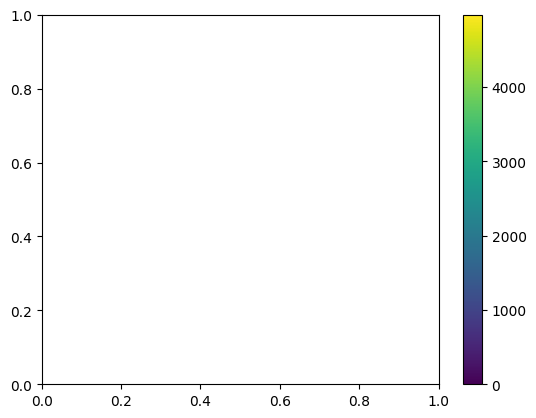

In [21]:
#making above plot into an animation
fig, ax = plt.subplots()
cbar = fig.colorbar(im, ax=ax)
cax = cbar.ax

count = 0
for i, sim in enumerate(sa):
    if i%100:
        continue
    